Simulating Stochastic Models:
This code simulates Daily stock price movements over a year (252 trading days) based on the GBM model.

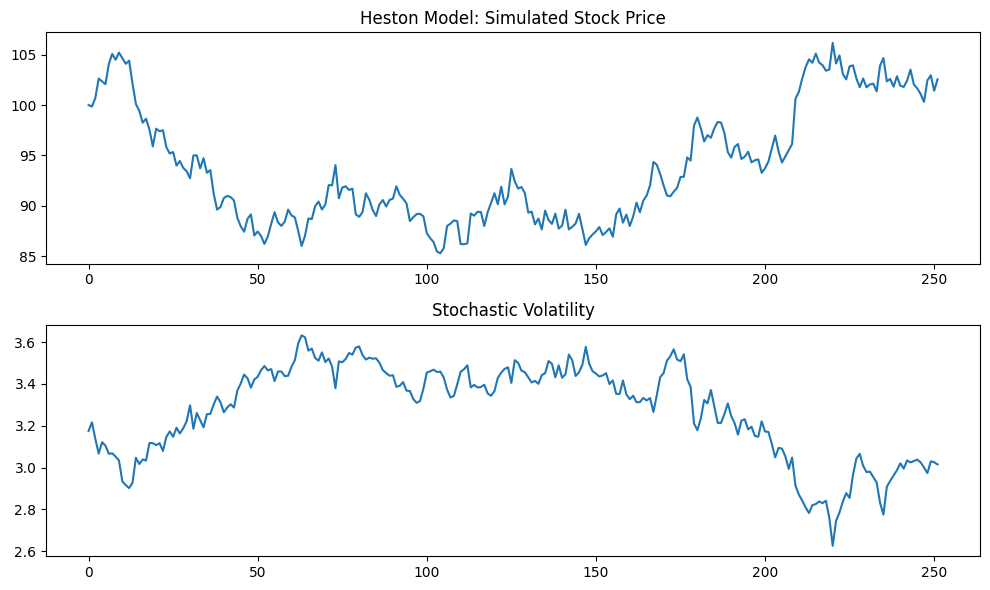

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def heston_model(S0, v0, mu, kappa, theta, sigma, rho, T, dt):
    n_steps = int(T/dt)
    S = np.zeros(n_steps)
    v = np.zeros(n_steps)
    S[0] = S0
    v[0] = v0

    # Correlated Wiener processes
    np.random.seed(42)
    dw1 = np.random.normal(0, np.sqrt(dt), n_steps)
    dw2 = rho * dw1 + np.sqrt(1 - rho**2) * np.random.normal(0, np.sqrt(dt), n_steps)

    for t in range(1, n_steps):
        dv = kappa * (theta - v[t-1]) * dt + sigma * np.sqrt(v[t-1]) * dw2[t]
        v[t] = max(v[t-1] + dv, 0)  # Ensure volatility is non-negative
        dS = mu * S[t-1] * dt + np.sqrt(v[t-1]) * S[t-1] * dw1[t]
        S[t] = S[t-1] + dS

    return S, v

# Parameters
S0 = 100      # Initial price
v0 = 0.04     # Initial volatility (sqrt(0.04) = 20% annualized)
mu = 0.05     # Drift
kappa = 3.0   # Mean reversion speed
theta = 0.04  # Long-term volatility
sigma = 0.1   # Volatility of volatility
rho = -0.7    # Correlation
T = 1         # Time horizon (1 year)
dt = 1/252    # Daily steps (252 trading days)

# Simulate
price, volatility = heston_model(S0, v0, mu, kappa, theta, sigma, rho, T, dt)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
ax1.plot(price)
ax1.set_title('Heston Model: Simulated Stock Price')
ax2.plot(np.sqrt(volatility * 252))  # Annualized volatility
ax2.set_title('Stochastic Volatility')
plt.tight_layout()
plt.show()